In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [7]:
isNotCenter = df.mean()>10**-10
isNotNormalized = (df.std()>1.01) | (df.std()<0.99)

In [7]:
df.loc[:,isNotCenter].columns

Int64Index([210], dtype='int64')

In [8]:
df.loc[:,isNotNormalized].columns

Int64Index([210], dtype='int64')

In [9]:
# df.iloc[:,:5].hist(figsize = (16,16))
# plt.show()

In [10]:
y = df.iloc[:,-1:]

In [11]:
x = df.iloc[:,:-1]

In [12]:
x.shape, y.shape

((442, 210), (442, 1))

In [13]:
sample_x = x.sample(4, axis=1)

In [14]:
sample = sample_x.add(y, fill_value=0)

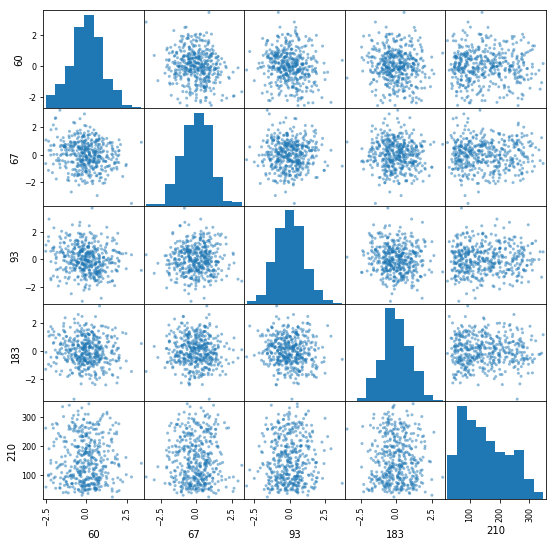

In [15]:
pd.plotting.scatter_matrix(sample, figsize=(9,9))
plt.show()

In [352]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

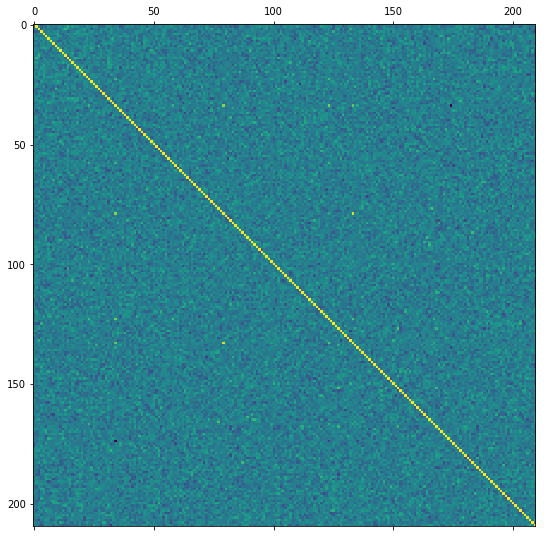

In [353]:
plt.figure(figsize=(9,9))
plt.matshow(x_train.corr(), fignum=1)

In [354]:
U, S, V = np.linalg.svd(x_train)

In [355]:
S.shape

(210,)

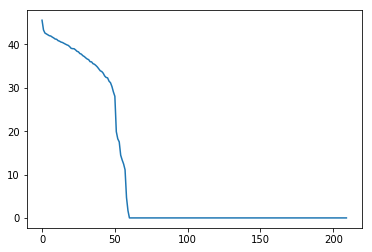

In [356]:
plt.plot(S);

In [357]:
V.shape

(210, 210)

In [358]:
df.shape

(442, 211)

In [359]:
U_pca = U[:,:60]
V_pca = V.T[:,:60]
S_pca = np.diag(S[:60])

In [360]:
V_pca.shape

(210, 60)

In [361]:
x_pca = x_train @ V_pca

In [362]:
df_pca = pd.DataFrame(x_pca)

In [363]:
df_pca.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,...,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,0.009500,-0.022080,0.033837,0.015421,0.015726,0.004439,0.003401,-0.019891,0.048365,-0.044023,...,0.027391,-0.040123,-0.021907,0.018397,-0.012639,0.006989,-0.000565,0.013581,0.003305,0.000851
std,2.429373,2.309804,2.271707,2.260388,2.250259,2.239328,2.235407,2.222550,2.211608,2.198286,...,1.494534,1.059036,0.971555,0.934517,0.771031,0.712717,0.663275,0.592061,0.250456,0.089505
min,-7.577816,-7.417911,-6.640618,-6.779936,-6.246965,-6.735460,-7.897473,-8.144737,-5.613123,-6.508634,...,-4.438070,-3.409722,-2.587192,-3.478642,-2.381457,-2.203517,-1.562418,-1.621761,-0.556901,-0.478924
25%,-1.523667,-1.528288,-1.563205,-1.432187,-1.431629,-1.631357,-1.484615,-1.699747,-1.386426,-1.481189,...,-0.985389,-0.772443,-0.660531,-0.618008,-0.576186,-0.469571,-0.438706,-0.370083,-0.176913,-0.034570
50%,0.045860,0.088955,0.046570,-0.015196,0.106193,-0.126719,-0.173504,-0.014227,0.111360,-0.088646,...,-0.002267,-0.152462,-0.044330,0.024834,-0.025979,-0.032254,-0.030104,0.021991,-0.003366,0.015301
75%,1.703190,1.544934,1.484323,1.515302,1.730535,1.547270,1.513790,1.382106,1.328329,1.443136,...,1.013374,0.625987,0.655491,0.719725,0.493019,0.457416,0.408605,0.378690,0.148331,0.055332
max,6.370331,5.974870,7.013906,7.392523,5.632934,6.342493,7.966223,10.182481,9.026384,6.760943,...,3.859002,3.633606,2.639250,2.232584,2.102386,2.249676,2.325018,1.661597,0.866583,0.177933


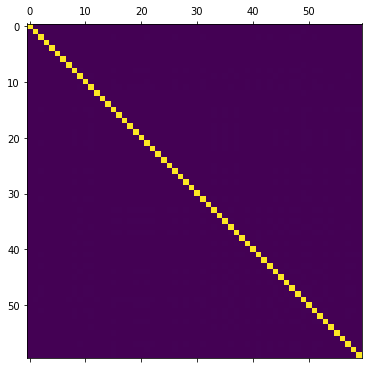

In [364]:
plt.figure(figsize=(6,6))
plt.matshow(df_pca.corr(), fignum=1)

In [365]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

In [366]:
lr = LinearRegression()

In [367]:
x_train.shape , y_train.shape

((353, 210), (353, 1))

In [368]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [369]:
lr_pca = LinearRegression()

In [370]:
lr_pca.fit(x_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [371]:
lr.coef_.shape

(1, 210)

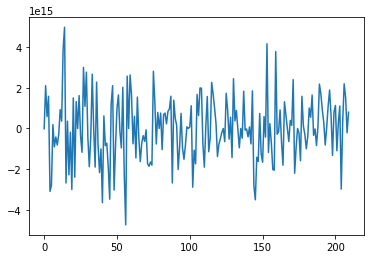

In [372]:
plt.plot(lr.coef_[0])

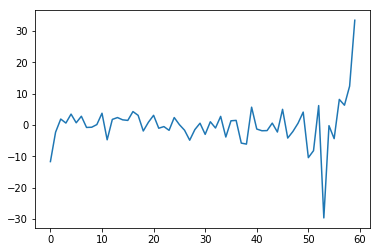

In [373]:
plt.plot(lr_pca.coef_[0])

In [374]:
lr.intercept_

array([150.25531161])

In [375]:
lr_pca.intercept_

array([151.14930832])

In [376]:
df_pca.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,...,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,0.009500,-0.022080,0.033837,0.015421,0.015726,0.004439,0.003401,-0.019891,0.048365,-0.044023,...,0.027391,-0.040123,-0.021907,0.018397,-0.012639,0.006989,-0.000565,0.013581,0.003305,0.000851
std,2.429373,2.309804,2.271707,2.260388,2.250259,2.239328,2.235407,2.222550,2.211608,2.198286,...,1.494534,1.059036,0.971555,0.934517,0.771031,0.712717,0.663275,0.592061,0.250456,0.089505
min,-7.577816,-7.417911,-6.640618,-6.779936,-6.246965,-6.735460,-7.897473,-8.144737,-5.613123,-6.508634,...,-4.438070,-3.409722,-2.587192,-3.478642,-2.381457,-2.203517,-1.562418,-1.621761,-0.556901,-0.478924
25%,-1.523667,-1.528288,-1.563205,-1.432187,-1.431629,-1.631357,-1.484615,-1.699747,-1.386426,-1.481189,...,-0.985389,-0.772443,-0.660531,-0.618008,-0.576186,-0.469571,-0.438706,-0.370083,-0.176913,-0.034570
50%,0.045860,0.088955,0.046570,-0.015196,0.106193,-0.126719,-0.173504,-0.014227,0.111360,-0.088646,...,-0.002267,-0.152462,-0.044330,0.024834,-0.025979,-0.032254,-0.030104,0.021991,-0.003366,0.015301
75%,1.703190,1.544934,1.484323,1.515302,1.730535,1.547270,1.513790,1.382106,1.328329,1.443136,...,1.013374,0.625987,0.655491,0.719725,0.493019,0.457416,0.408605,0.378690,0.148331,0.055332
max,6.370331,5.974870,7.013906,7.392523,5.632934,6.342493,7.966223,10.182481,9.026384,6.760943,...,3.859002,3.633606,2.639250,2.232584,2.102386,2.249676,2.325018,1.661597,0.866583,0.177933


In [377]:
from sklearn.preprocessing import StandardScaler

In [378]:
y_train.mean()

210    150.130312
dtype: float64

In [379]:
scaler = StandardScaler()

In [380]:
scaler.fit(x_pca)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [381]:
x_cr = scaler.transform(x_pca)

In [382]:
lr_cr = LinearRegression()

In [383]:
lr_cr.fit(x_cr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [384]:
lr_cr.intercept_

array([150.13031161])

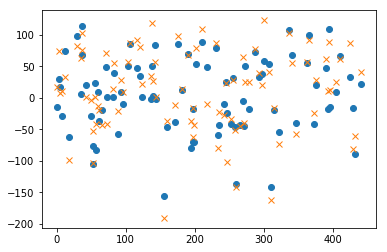

In [385]:
plt.plot(y_test - lr_pca.predict(x_test @ V_pca), "o")
plt.plot(y_test - lr.predict(x_test), "x")

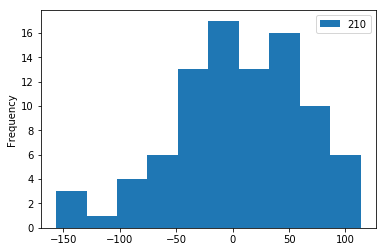

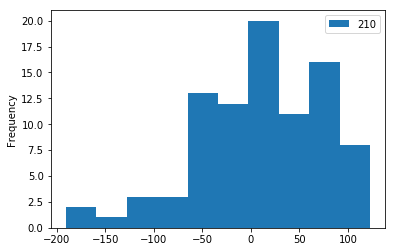

In [386]:
(y_test - lr_pca.predict(x_test @ V_pca)).plot.hist()
(y_test - lr.predict(x_test)).plot.hist()

In [387]:
lr_pca.score(x_test @ V_pca,y_test)

0.42512260514802147

In [388]:
4700, 3400___________ 58 123

SyntaxError: invalid token (<ipython-input-388-8f043163b223>, line 1)

In [389]:
lr.score(x_test,y_test)

0.29742262143689535

In [390]:
from sklearn.feature_selection import f_regression

In [391]:
x_train[0].values.reshape(1,-1).shape, y_train.values.shape

((1, 353), (353, 1))

In [392]:
x_train.iloc[:,0].values.reshape(1,-1).shape

(1, 353)

In [424]:
data = x_train
features = []
theta = []
r =  y_train.values.ravel()
pvals = []
while not data.empty:
#     print(data.shape)
    regr = f_regression(data, r)
    m = min(regr[1])
    pvals.append(m)
    col = data.columns[regr[1].tolist().index(m)]
    print(col)
    lr_ = LinearRegression()
    lr_.fit(x_train[col].values.reshape(-1,1), r.ravel())
    theta.append(lr_.coef_[0])
    r -= x_train[col].apply(lambda x : x*theta[-1])
    data = data.drop(columns=col)
    features.append(col)

58
123
31
13
174
152
208
133
167
135
114
126
129
20
19
159
59
111
0
75
92
23
48
107
26
101
71
49
79
194
33
41
121
34
65
87
200
125
147
99
109
37
16
131
132
88
193
104
141
11
139
108
57
202
91
136
182
68
142
53
80
10
188
96
130
187
163
113
153
173
149
55
38
140
106
189
203
198
70
90
148
145
151
184
154
2
138
172
77
56
63
171
146
100
164
97
64
118
7
105
206
32
102
199
150
161
43
66
52
44
112
195
175
62
196
191
85
185
61
14
143
186
25
93
42
209
21
122
36
144
156
170
9
137
166
74
84
94
29
116
69
50
197
179
86
24
120
124
82
119
168
72
47
40
15
67
181
54
6
178
103
169
1
81
60
201
183
35
190
22
110
17
165
204
160
162
45
5
158
128
27
134
115
89
207
127
73
155
8
192
83
3
176
117
95
18
39
98
51
28
12
177
157
78
30
180
46
76
4
205


In [394]:
features

[58,
 123,
 31,
 13,
 174,
 152,
 208,
 133,
 167,
 135,
 114,
 126,
 129,
 20,
 19,
 159,
 59,
 111,
 0,
 75,
 92,
 23,
 48,
 107,
 26,
 101,
 71,
 49,
 79,
 194,
 33,
 41,
 121,
 34,
 65,
 87,
 200,
 125,
 147,
 99,
 109,
 37,
 16,
 131,
 132,
 88,
 193,
 104,
 141,
 11,
 139,
 108,
 57,
 202,
 91,
 136,
 182,
 68,
 142,
 53,
 80,
 10,
 188,
 96,
 130,
 187,
 163,
 113,
 153,
 173,
 149,
 55,
 38,
 140,
 106,
 189,
 203,
 198,
 70,
 90,
 148,
 145,
 151,
 184,
 154,
 2,
 138,
 172,
 77,
 56,
 63,
 171,
 146,
 100,
 164,
 97,
 64,
 118,
 7,
 105,
 206,
 32,
 102,
 199,
 150,
 161,
 43,
 66,
 52,
 44,
 112,
 195,
 175,
 62,
 196,
 191,
 85,
 185,
 61,
 14,
 143,
 186,
 25,
 93,
 42,
 209,
 21,
 122,
 36,
 144,
 156,
 170,
 9,
 137,
 166,
 74,
 84,
 94,
 29,
 116,
 69,
 50,
 197,
 179,
 86,
 24,
 120,
 124,
 82,
 119,
 168,
 72,
 47,
 40,
 15,
 67,
 181,
 54,
 6,
 178,
 103,
 169,
 1,
 81,
 60,
 201,
 183,
 35,
 190,
 22,
 110,
 17,
 165,
 204,
 160,
 162,
 45,
 5,
 158,
 128,
 27,
 134

In [395]:
y_train.values.ravel()

array([131., 270.,  77.,  40.,  59., 122., 273., 123., 232., 208., 202.,
       268.,  87., 217., 154.,  67.,  98., 107., 233., 180., 143., 164.,
       180.,  92., 168., 115., 137., 308.,  91., 310.,  84., 131., 170.,
       179., 128., 178., 233., 127.,  88., 168., 197., 242., 281., 155.,
       292.,  71., 230., 171.,  99., 148.,  63., 283., 288.,  60.,  54.,
       341., 230.,  53.,  75., 104., 182., 216., 144.,  51., 245., 131.,
       177., 184., 243.,  47., 201., 136., 190., 124.,  91., 161.,  63.,
       109., 158., 118.,  65.,  71., 186.,  49., 122., 151.,  84.,  48.,
       135., 109., 242.,  91., 182., 297., 252., 111.,  88., 150.,  61.,
       202.,  51., 259.,  72., 225., 138., 134., 108.,  90., 270., 214.,
       248., 113., 164., 183.,  64.,  88., 264.,  83., 115.,  60., 200.,
       158., 172.,  79., 174.,  48.,  68.,  39.,  78.,  67.,  51., 182.,
        97.,  31., 102., 258., 129., 222., 261., 303., 109.,  48.,  55.,
        77.,  81.,  55., 262.,  39., 143., 277.,  4

In [396]:
y_train.values.shape

(353, 1)

In [397]:
regr[1]

array([0.99999539])

In [398]:
sorted([i for i in enumerate(regr[1])], key=lambda x : x[1])

[(0, 0.9999953869730652)]

In [399]:
x_train.shape

(353, 210)

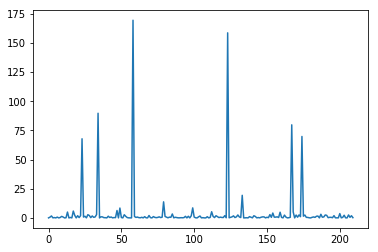

58


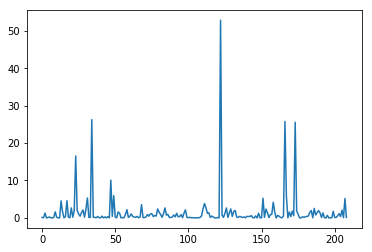

123


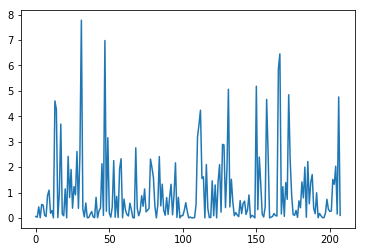

31


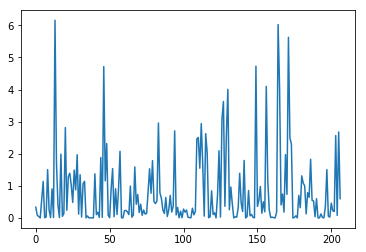

13


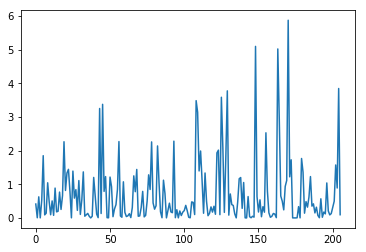

174


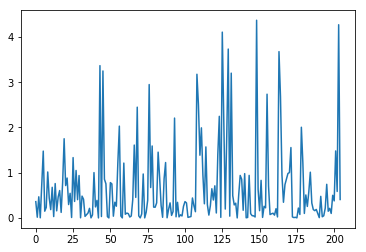

152


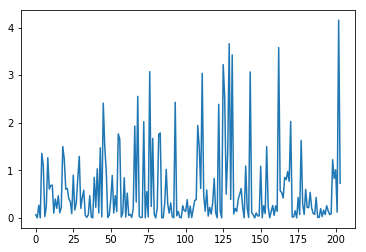

208


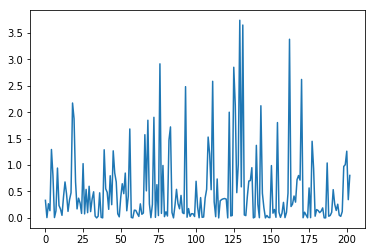

133


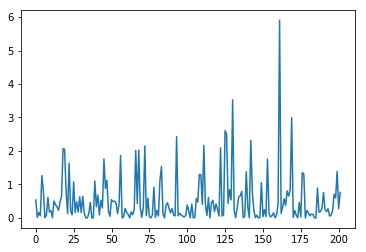

167


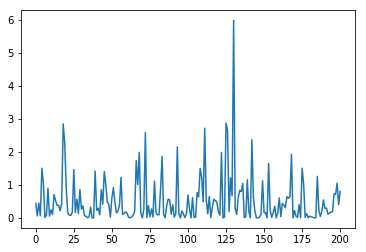

135


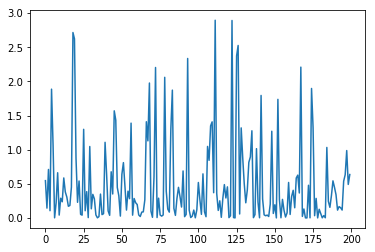

114


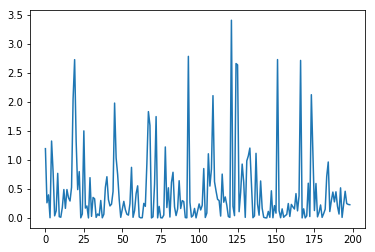

126


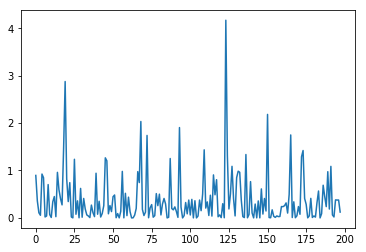

129


In [400]:
data = x_train
features_selected = []
theta = []
r =  y_train.values.ravel()
while not data.empty:
#     print(data.shape)
    regr = f_regression(data, r)
    m = min(regr[1])
    if m> 0.1:
        break
    plt.plot(regr[0])
    plt.show()
    col = data.columns[regr[1].tolist().index(m)]
    print(col)
    lr_ = LinearRegression()
    lr_.fit(x_train[col].values.reshape(-1,1), r.ravel())
    theta.append(lr_.coef_[0])
    r -= x_train[col].apply(lambda x : x*theta[-1])
    data = data.drop(columns=col)
    features_selected.append(col)

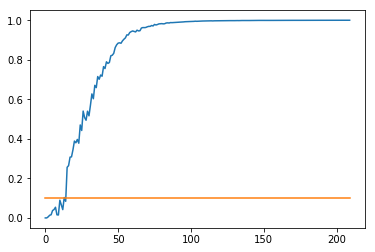

In [401]:
plt.plot(pvals)
plt.plot([0.1]*210)

In [402]:
x_selected = x_train[features_selected]

In [403]:
x_selected.shapeloc[93]

AttributeError: 'DataFrame' object has no attribute 'shapeloc'

In [404]:
lr_selected = LinearRegression()

In [405]:
lr_selected.fit(x_selected, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [406]:
lr_selected.score(x_test[features_selected], y_test)

0.5130437950592797

In [407]:
from sklearn import model_selection

In [408]:
kf = model_selection.KFold(n_splits=4)

In [409]:
kf.get_n_splits(x_selected)

4

In [410]:
np.array([0,2]).mean()

1.0

In [411]:
np.array(scores).mean()

0.33732059694760896

In [412]:
r = []
for alpha in [10**(x)/100000 for x in range(20)]:
    ridge =  Ridge(alpha=alpha)
    scores = []
    for train_index, test_index in kf.split(x_selected):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x_selected.iloc[train_index], x_selected.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        ridge.fit(X_train, Y_train)
        scores.append(ridge.score(X_test, Y_test))
    r.append(np.array(scores).mean())
    print('alpha :'+ str(alpha) + "----> score mean :" + str(r[-1]))

alpha :1e-05----> score mean :0.4935479467393821
alpha :0.0001----> score mean :0.4935479664570753
alpha :0.001----> score mean :0.4935481636279186
alpha :0.01----> score mean :0.4935501347276058
alpha :0.1----> score mean :0.49356978491096337
alpha :1.0----> score mean :0.4937602657338666
alpha :10.0----> score mean :0.4951178568130915
alpha :100.0----> score mean :0.48195650142994284
alpha :1000.0----> score mean :0.27069613684166227
alpha :10000.0----> score mean :0.03478928513446325
alpha :100000.0----> score mean :-0.010402270817125886
alpha :1000000.0----> score mean :-0.01532115197904349
alpha :10000000.0----> score mean :-0.01581736950035334
alpha :100000000.0----> score mean :-0.01586703490508279
alpha :1000000000.0----> score mean :-0.015872001882443088
alpha :10000000000.0----> score mean :-0.015872498584548478
alpha :100000000000.0----> score mean :-0.01587254825480261
alpha :1000000000000.0----> score mean :-0.01587255322182851
alpha :10000000000000.0----> score mean :-0.0

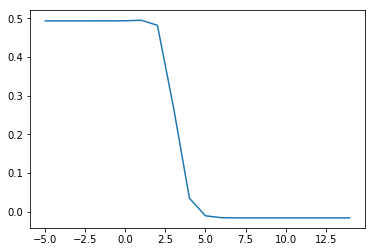

In [413]:
plt.plot([np.log10(10**(x)/100000) for x in range(20)],r)

In [416]:
df.shape

(442, 211)

In [418]:
r = []
for alpha in [10**(x)/100000 for x in range(6)]:
    ridge =  Ridge(alpha=alpha)
    scores = []
    for train_index, test_index in kf.split(df[features_selected]):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = df[features_selected].iloc[train_index], df[features_selected].iloc[test_index]
        Y_train, Y_test = df[210].iloc[train_index], df[210].iloc[test_index]
        ridge.fit(X_train, Y_train)
        scores.append(ridge.score(X_test, Y_test))
    r.append(np.array(scores).mean())
    print('alpha :'+ str(alpha) + "----> score mean :" + str(r[-1]))

alpha :1e-05----> score mean :0.5031466807068132
alpha :0.0001----> score mean :0.5031466869550718
alpha :0.001----> score mean :0.5031467494343633
alpha :0.01----> score mean :0.5031473738979276
alpha :0.1----> score mean :0.5031535856295601
alpha :1.0----> score mean :0.5032124432603607


In [426]:
features_selected

[58, 123, 31, 13, 174, 152, 208, 133, 167, 135, 114, 126, 129]